In [58]:
## Classifications

In [59]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Softmax, Linear, Relu, Sigmoid, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

<AxesSubplot:xlabel='f1', ylabel='f2'>

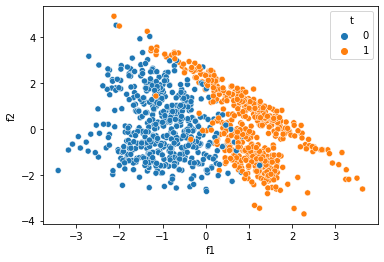

In [60]:

x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    #random_state=2107
)
df = pd.DataFrame(x, columns=['f1','f2'])
df['t'] = y
sns.scatterplot(data=df, x='f1',y='f2', hue='t')

In [61]:
model = NeuralNetwork(
    layers = [
        Relu(n_input=2, n_output=2),
        Softmax(n_input=2, n_output=2)
    ],
    optimizer = GradientDescent(learning_rate=3e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=1000
)

In [62]:
model

NeuralNetwork(layers=[Relu(n_input=2, n_output=2, weights=array([[ 0.00488196, -0.01178507],
       [ 0.00643307,  0.01143029]]), bias=array([[-0.01950711],
       [-0.01244376]]), x=None, z=None, dz=None, grads_dw=None, grads_db=None, type=<LayersEnum.relu: 'relu'>), Softmax(n_input=2, n_output=2, weights=array([[-0.01250808, -0.00575404],
       [-0.0126283 , -0.01178248]]), bias=array([[-0.00147838],
       [-0.01212009]]), x=None, z=None, dz=None, grads_dw=None, grads_db=None, type=<LayersEnum.softmax: 'softmax'>)], cache=None, optimizer=GradientDescent(learning_rate=0.03), loss=<gympy.loss.loss.CategoricalCrossEntropy object at 0x7fc222575400>, n_iter=1000, cost=None)

In [63]:
X = x.T

Y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1)).T
Y 

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [64]:
tt = model.forward(X[:,0:100])
CategoricalCrossEntropy()(tt, Y[:,0:100])

0.6932704854208276

In [65]:
df

,f1,f2,t
0,3.153057,-1.027344,1
1,-2.228622,2.573663,0
2,1.486295,-1.682418,1
3,1.025041,-1.386033,1
4,-0.716876,-0.662546,0
...,...,...,...
995,0.174578,-1.307082,0
996,0.266770,-0.949147,0
997,-1.394469,-1.455474,0
998,-0.944733,0.583829,0


<AxesSubplot:xlabel='f1', ylabel='f2'>

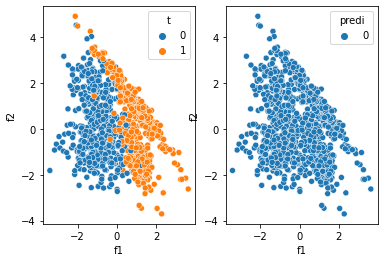

In [66]:

probi = model.forward(X)
pred = np.argmax(probi, axis=0)
df['predi'] = pred

fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='predi', ax=ax[1])

In [67]:
model.train(X, Y)

0 cost 0.6932075786117179
10 cost 0.6931426658849007
20 cost 0.6931229837444267
30 cost 0.6931162934087213
40 cost 0.6931129101422152
50 cost 0.6931095093446612
60 cost 0.6931039357630995
70 cost 0.6930929400254822
80 cost 0.6930696011218948
90 cost 0.6930141687267278
100 cost 0.6928684306413763
110 cost 0.6924769011769407
120 cost 0.6913911141532793
130 cost 0.6883625397336693
140 cost 0.6801052200617091
150 cost 0.6589265555053647
160 cost 0.6122909928422482
170 cost 0.5346134756717656
180 cost 0.4451855259552141
190 cost 0.37281769695008143
200 cost 0.3235749912343869
210 cost 0.280287282498459
220 cost 0.23955537658337972
230 cost 0.20851277189308082
240 cost 0.1882501358229535
250 cost 0.17663581840617557
260 cost 0.17164868737819763
270 cost 0.1712512092742121
280 cost 0.17357271182742973
290 cost 0.17784480136136288
300 cost 0.1824965616582181
310 cost 0.18646454090313608
320 cost 0.18932477744398504
330 cost 0.19110055880114205
340 cost 0.19200403956714018
350 cost 0.1922499446

In [68]:
prob = model.forward(X)
pred = np.argmax(prob, axis=0)

df['pred'] = pred
df.head()

,f1,f2,t,predi,pred
0,3.153057,-1.027344,1,0,1
1,-2.228622,2.573663,0,0,0
2,1.486295,-1.682418,1,0,1
3,1.025041,-1.386033,1,0,1
4,-0.716876,-0.662546,0,0,0


<AxesSubplot:xlabel='f1', ylabel='f2'>

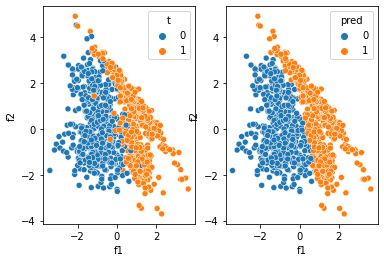

In [69]:
fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='f1',y='f2', hue='t', ax=ax[0])
sns.scatterplot(data=df, x='f1',y='f2', hue='pred', ax=ax[1])